<a href="https://colab.research.google.com/github/AkyLast/Project-Prediction-Digits/blob/main/digit_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [120]:
df = pd.read_csv("digit_prediction_project.csv")

In [121]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Classification
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [122]:
df["Classification"].value_counts()

,count
Classification,
3,183
1,182
5,182
4,181
6,181
9,180
7,179
0,178
2,177


In [134]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Classification
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [123]:
X = df.drop("Classification", axis = 1)
y = df["Classification"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [124]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Acc:", accuracy_score(y_test, y_pred))
print("\n", classification_report(y_test, y_pred))

Acc: 0.9722222222222222

               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [125]:
param = list(range(100, 400, 10))

model_score_10, model_score_20, model_score_30, model_score_40, model_score_50 = [], [], [], [], []
for i in param:
  for (x, score) in zip(range(10, 60, 10), [model_score_10, model_score_20, model_score_30, model_score_40, model_score_50]):
    forest = RandomForestClassifier(n_estimators = i,  max_depth = x)
    forest.fit(X_train, y_train)

    y_pred = forest.predict(X_test)

    score.append(accuracy_score(y_test, y_pred))

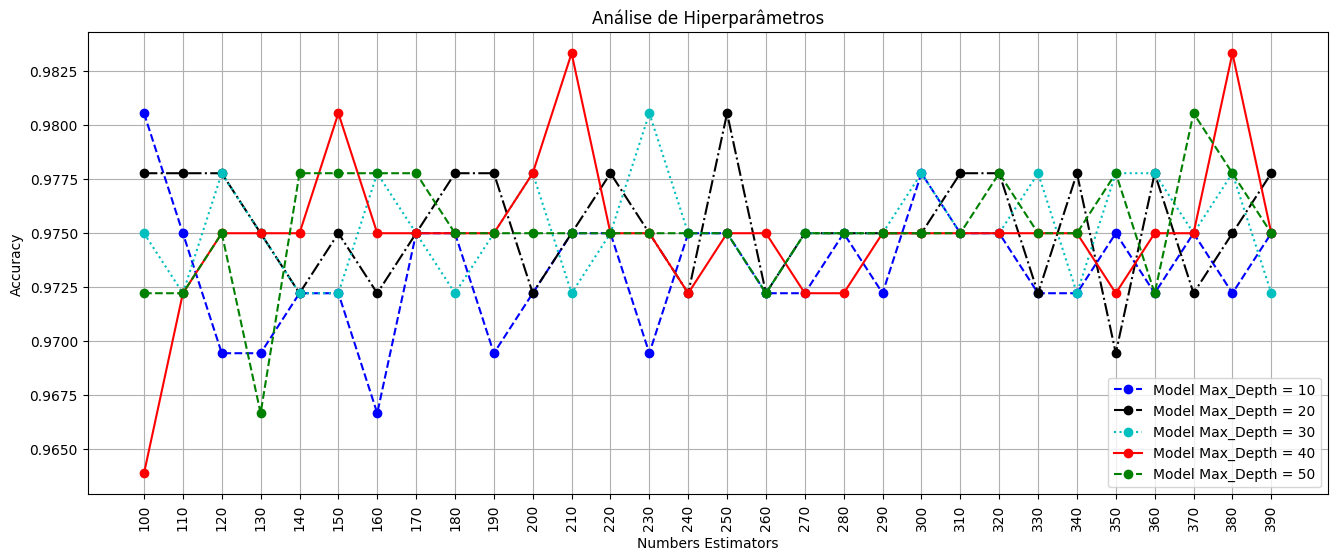

In [126]:
plt.figure(figsize = (16, 6))
plt.plot(param, model_score_10, marker = "o", linestyle = "--", color = "b", label = "Model Max_Depth = 10")
plt.plot(param, model_score_20, marker = "o", linestyle = "-.", color = "k", label = "Model Max_Depth = 20")
plt.plot(param, model_score_30, marker = "o", linestyle = ":", color = "c", label = "Model Max_Depth = 30")
plt.plot(param, model_score_40, marker = "o", linestyle = "-", color = "r", label = "Model Max_Depth = 40")
plt.plot(param, model_score_50, marker = "o", linestyle = "--", color = "g", label = "Model Max_Depth = 50")
plt.title("Análise de Hiperparâmetros")
plt.xlabel("Numbers Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks(param, rotation = 90)
plt.grid()
plt.show()

In [127]:
rf = RandomForestClassifier(random_state = 42)

param_grid = {
    "n_estimators": [150],
    "max_depth" : [50],
    "max_features": ["sqrt", "log2", None]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, scoring = "accuracy", verbose = 1, n_jobs = -1)

grid_search.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Melhores parâmetros: {'max_depth': 50, 'max_features': 'log2', 'n_estimators': 150}


In [128]:
best_model = grid_search.best_estimator_
acc = best_model.score(X_test, y_test)

print("Acc:", acc)

Acc: 0.9777777777777777


In [129]:
model = RandomForestClassifier(n_estimators = 150, max_depth = 50, max_features = "log2")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Acc:", accuracy_score(y_test, y_pred))
print("\n", classification_report(y_test, y_pred))

Acc: 0.9777777777777777

               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.96      0.98      0.97        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [130]:
y_true = y_test.values
y_pred = model.predict(X_test)

classes = sorted(set((y_true + y_pred) // 2))
n_classes = len(classes)

matriz_conf = [[0] * n_classes for _ in range(n_classes)]

for (true, pred) in zip(y_true, y_pred):
  matriz_conf[true][pred] += 1

print("Matriz de Confusão: \n")

print("      ", "  ".join(map(str, classes)))
for i, row in enumerate(matriz_conf):
  print(f"{classes[i]}: {row}")

print("\n")

Matriz de Confusão: 

       0  1  2  3  4  5  6  7  8  9
0: [32, 0, 0, 0, 1, 0, 0, 0, 0, 0]
1: [0, 28, 0, 0, 0, 0, 0, 0, 0, 0]
2: [0, 0, 33, 0, 0, 0, 0, 0, 0, 0]
3: [0, 0, 0, 34, 0, 0, 0, 0, 0, 0]
4: [0, 0, 0, 0, 46, 0, 0, 0, 0, 0]
5: [0, 0, 0, 0, 0, 46, 1, 0, 0, 0]
6: [0, 0, 0, 0, 0, 1, 34, 0, 0, 0]
7: [0, 0, 0, 0, 0, 0, 0, 33, 0, 1]
8: [0, 2, 0, 0, 0, 0, 0, 0, 28, 0]
9: [0, 0, 0, 0, 0, 1, 0, 1, 0, 38]




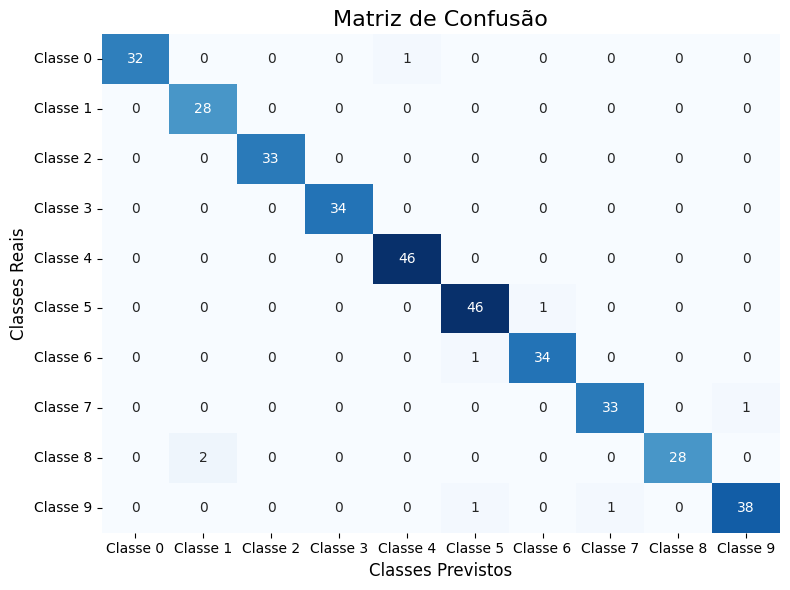

In [131]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão", fontsize=16)
plt.xlabel("Classes Previstos", fontsize=12)
plt.ylabel("Classes Reais", fontsize=12)
plt.xticks(ticks=np.arange(len(matriz_conf)) + 0.5, labels=[f"Classe {i}" for i in range(len(matriz_conf))])
plt.yticks(ticks=np.arange(len(matriz_conf)) + 0.5, labels=[f"Classe {i}" for i in range(len(matriz_conf))], rotation=0)
plt.tight_layout()
plt.show()

In [132]:
tp = sum(matriz_conf[i][i] for i, _ in enumerate(matriz_conf))
fn = sum(sum(row) - row[i] for i, row in enumerate(matriz_conf))
fp = sum(
    sum(matriz_conf[j][i] for j, _ in enumerate(matriz_conf)) - matriz_conf[i][i] for i, _ in enumerate(matriz_conf)
)
total = sum(sum(row) for row in matriz_conf)
tn = sum(
    total - sum(matriz_conf[i]) - sum(matriz_conf[j][i] for j in range(len(matriz_conf))) + matriz_conf[i][i]
    for i in range(len(matriz_conf))
)

In [133]:
# Entendendo as Métricas

Sensibilidade = tp / (tp + fn)
Especificidade = tn /(fp + tn)
Acuracia = (tp + tn) / (tp + tn + fp + fn)
Precisao = tp / (tp + fp)
F_Score = 2 * (Precisao *  Sensibilidade) / (Precisao +  Sensibilidade)

print(f"Sensibilidade (Recall): {Sensibilidade:.4f}")
print(f"Especificidade: {Especificidade:.4f}")
print(f"Acuracia: {Acuracia:.4f}")
print(f"Precisao: {Precisao:.4f}")
print(f"F-Score: {F_Score:.4f}")

Sensibilidade (Recall): 0.9778
Especificidade: 0.9975
Acuracia: 0.9956
Precisao: 0.9778
F-Score: 0.9778
